In [1]:
#a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_excel("1645792390_cep1_dataset.xlsx")  
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [5]:
#Missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.isnull()

age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False  False    False    False  False   
301  False  False  False     False  False  False    False    False  False   
302  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  target  
0      False  False  False  False   False  
1      False  False  False  False   False  
2      False  False  False  False   False  
3      False  False  False  False   False  
4      False  False  False  False   False  
..       ...    ...    ...    ...     ...  
298    False  False  False  False   False  
299    False  False  False  False   False  
300    False  False  False  False   False  
301    False  False  False  False   False  
302    False  False  False  False   False  

[303 rows x 14 columns]

In [7]:
#sum of all the Null Values
df.isnull().sum().sum() #the data set has no null values

0

In [8]:
#find categorical variables
#Numerical variables
data_num=df.select_dtypes(include=[np.number])
data_num

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [9]:
#Categorical variables
df.select_dtypes(exclude=[np.number]) # The following data set has no categorical variables.

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[303 rows x 0 columns]

<AxesSubplot:xlabel='age', ylabel='count'>

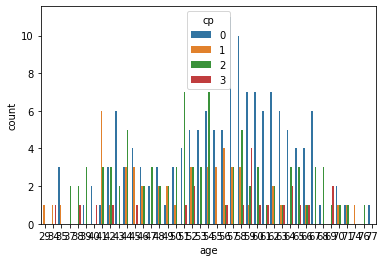

In [10]:
#count plot  for age vs chest pain. how is age factor related to chest pain
sns.countplot(x ='age', hue = "cp", data = df)

In [11]:
#a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='sex', ylabel='trestbps'>

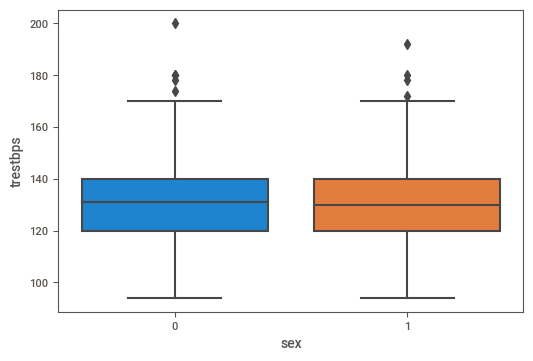

In [12]:
#the composition of all patients with respect to the Sex category
sns.boxplot(y='trestbps',x='sex',data=df)

<AxesSubplot:xlabel='target', ylabel='trestbps'>

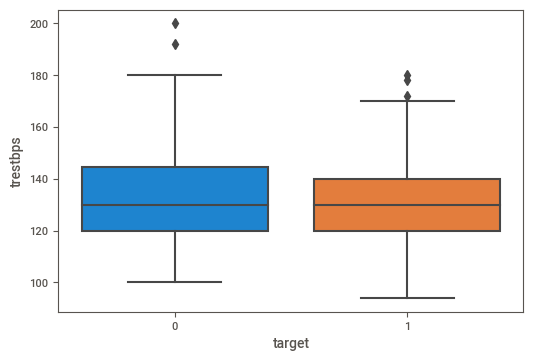

In [13]:
#detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
sns.boxplot(y='trestbps',x='target',data=df)

<AxesSubplot:xlabel='target', ylabel='age'>

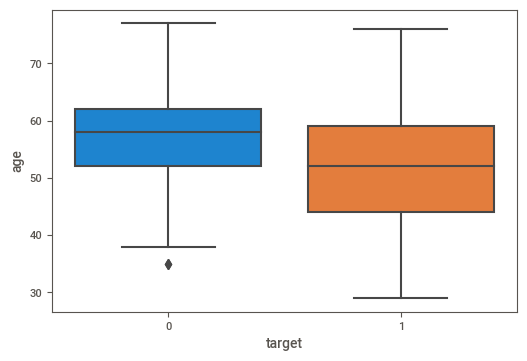

In [14]:
#the occurrence of CVD across the Age category
sns.boxplot(y='age',x='target',data=df)

<AxesSubplot:xlabel='target', ylabel='chol'>

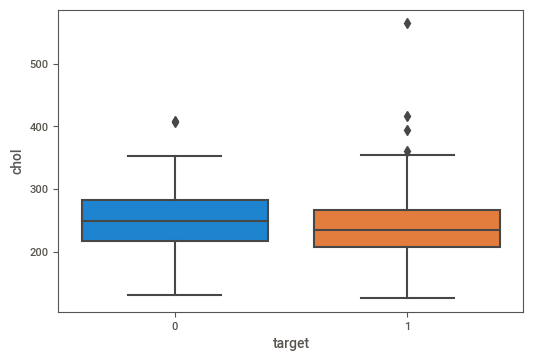

In [15]:
#The relationship between cholesterol levels and a target variable
sns.boxplot(y='chol',x='target',data=df)

<AxesSubplot:xlabel='target', ylabel='thalach'>

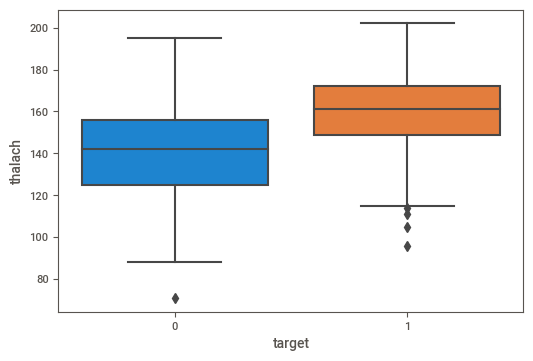

In [16]:
#Thalassemia is a major cause of CVD
sns.boxplot(y='thalach',x='target',data=df)

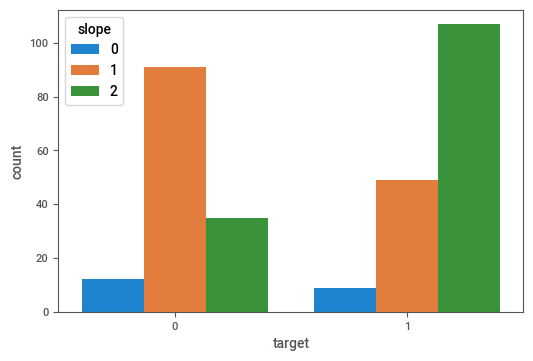

In [17]:
#relationship that exists between peak exercising and the occurrence of a heart attack

sns.countplot(x ="target", hue ="slope",
            data = df);


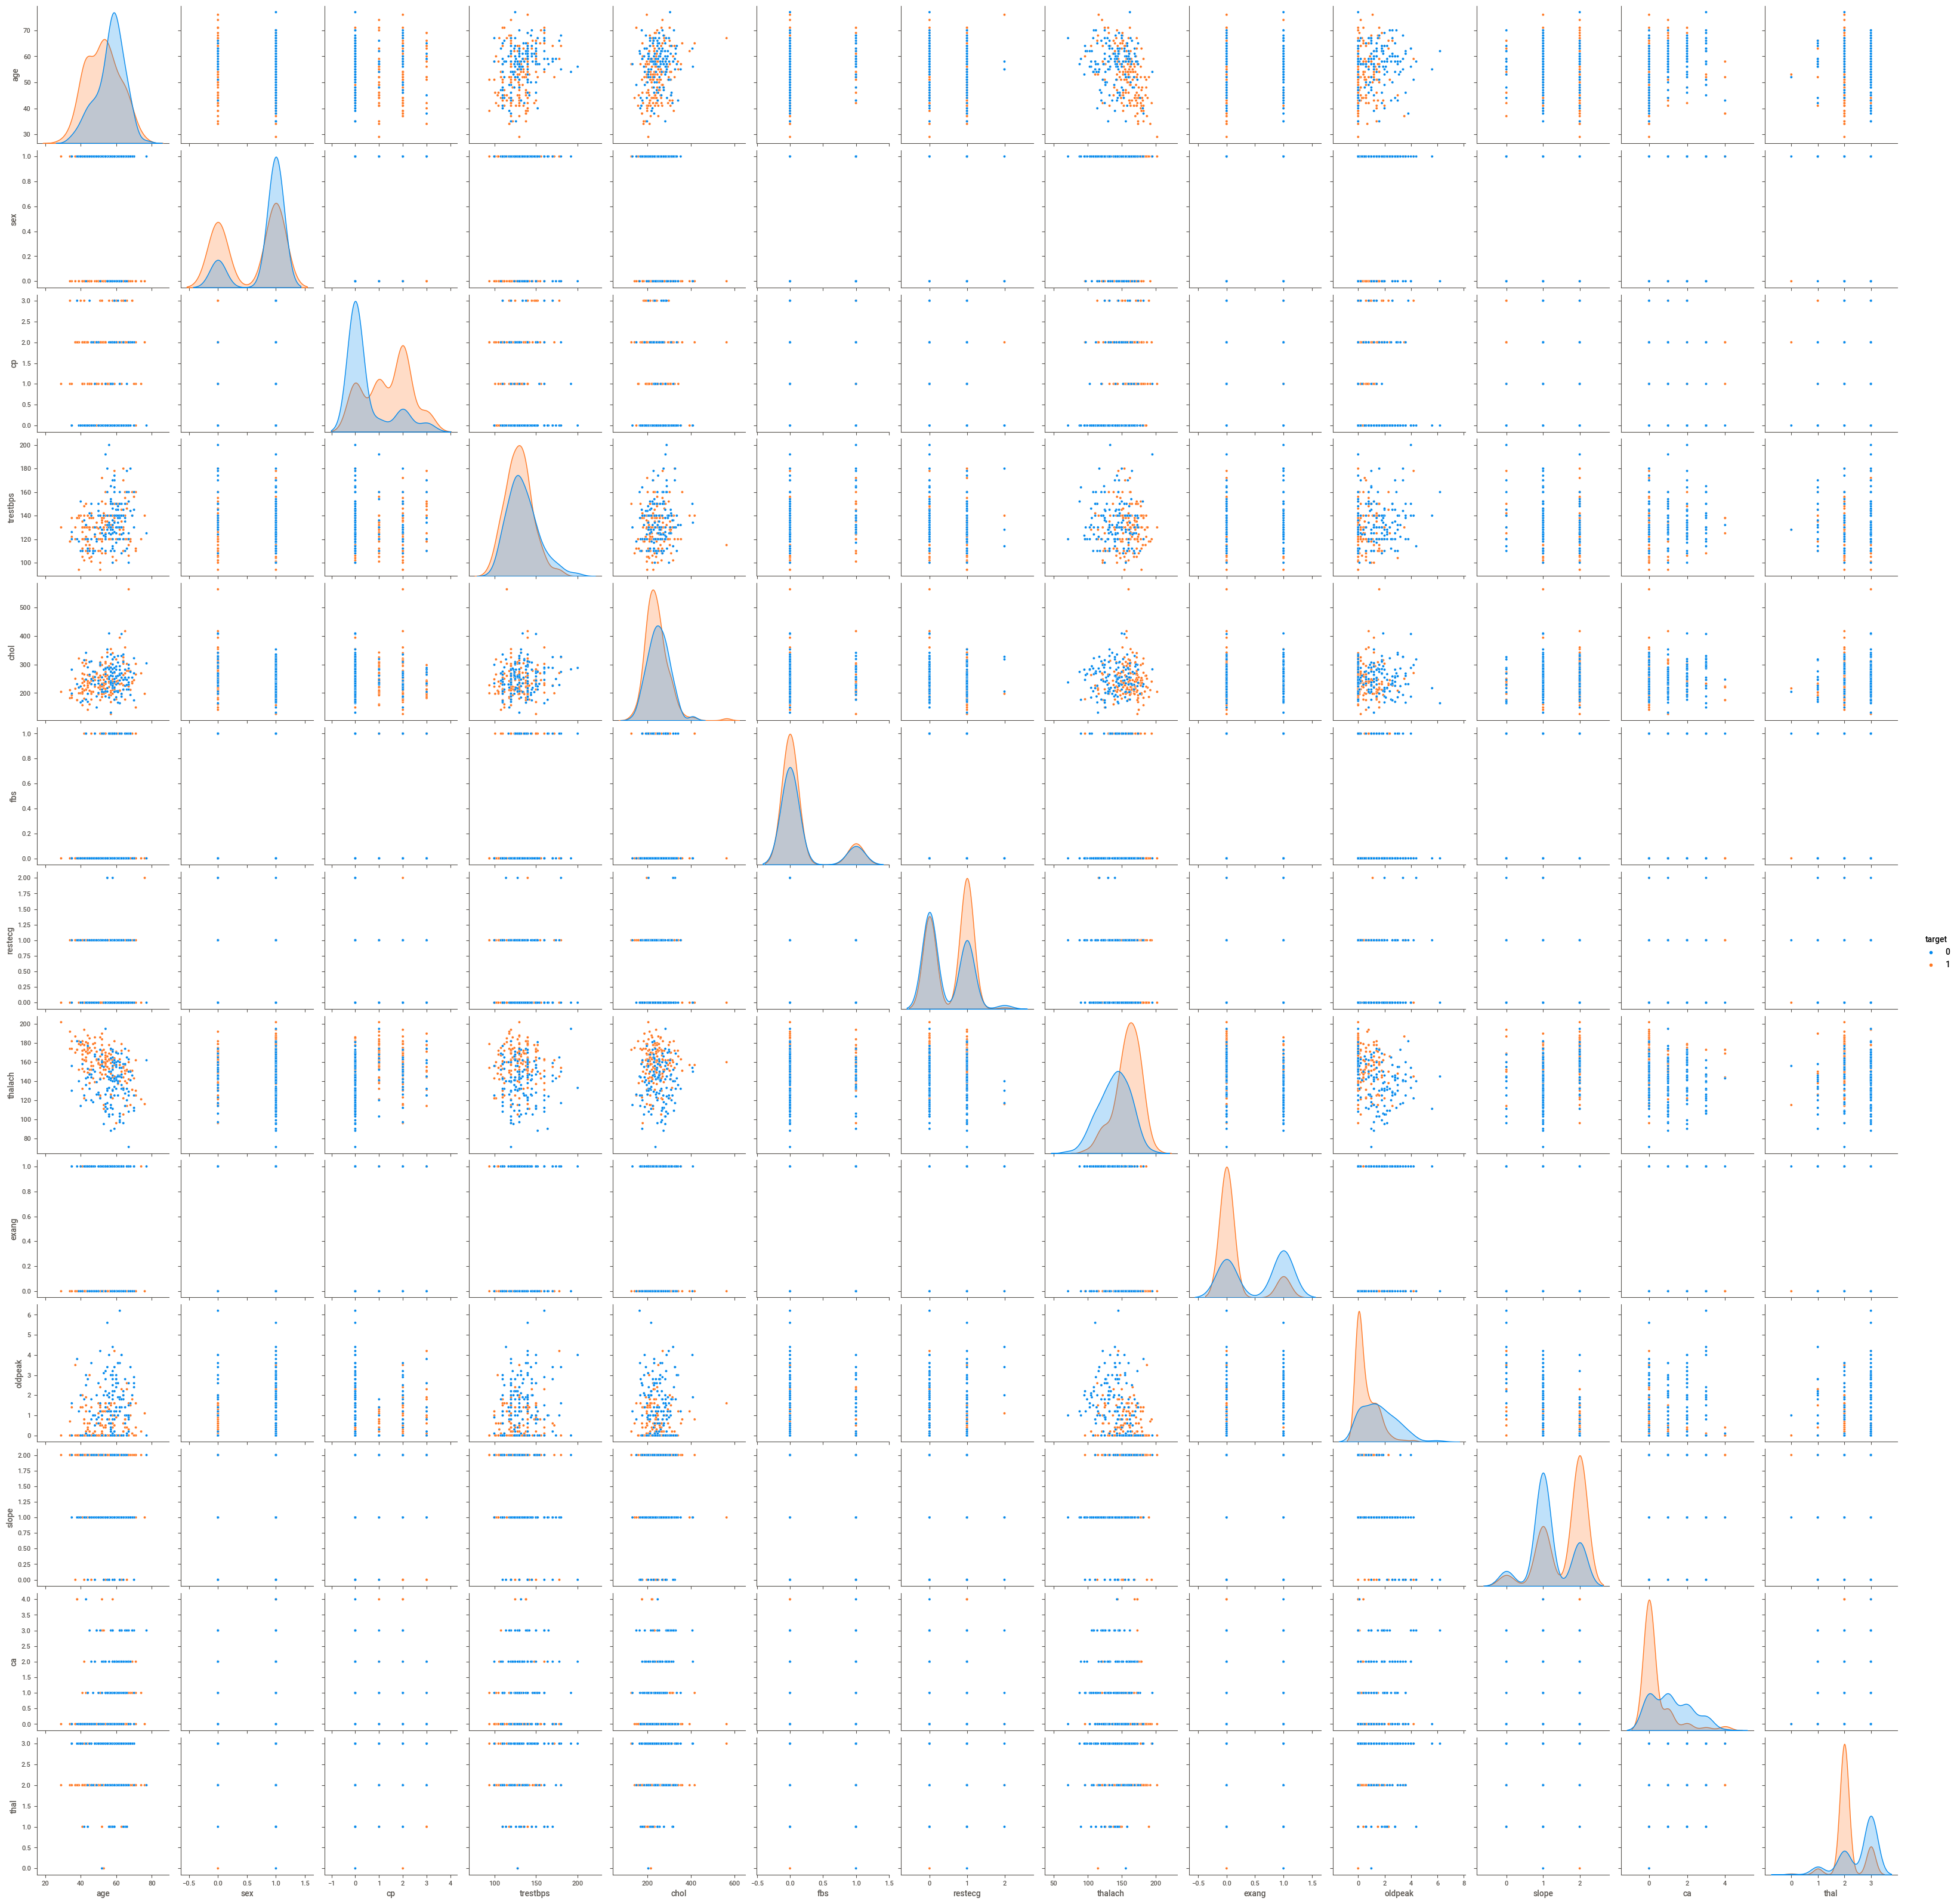

In [18]:
#pair plot to understand the relationship between all the given variables
sns.pairplot(df,diag_kind='kde',hue='target')

In [19]:
#Other factors determine the occurrence of CVD
import plotly.express as px
px.parallel_coordinates(df)

<AxesSubplot:>

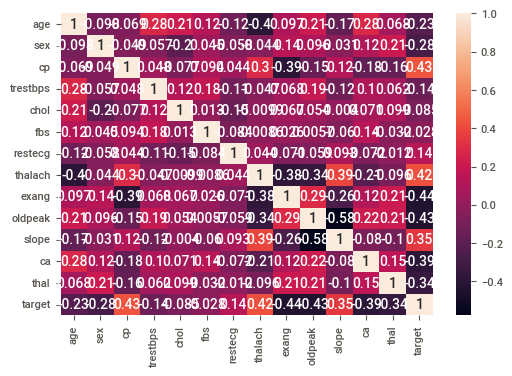

In [20]:
#Other factors determine the occurrence of CVD
sns.heatmap(df.corr(),annot=True)

In [21]:
#a baseline model to predict the risk of a heart attack 
from sklearn.model_selection import train_test_split
y=df['target']
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
dt = LogisticRegression()
dt.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training Accuracy")
print(dt.score(X_train,y_train))

What is the Testing Accuracy
0.7704918032786885
What is the Training Accuracy
0.859504132231405


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
predicted = dt.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[20 10]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

